## Notação matemática usada na prática

Adotamos o padrão matemático para definir as variáveis a seguir. Nesse padrão, todas as variáveis que representam matrizes estão em maiúsculas, vetores em negrito e minúscula e, valores numéricos, como variáveis minusculas. Logo após, mapeamos cada variável matemática com uma respectiva variável em Python.

- $m$: quantidade de instancias
- $f$: quantidade de atributos
- $X$: Matriz de instâncias representadas pelo seus atributos dimensão $(m,f)$
- $\pmb{y}$: Vetor de tamanho $m$ representando a classe real de cada instância
- $\pmb{\hat{y}}$: Vetor de predições que, para cada instancia, possui o valor predito para ela. Caso seja uma classificação binária, este valor será 0 ou 1
- $\pmb{w}$: vetor de pesos para ponderar os atributos (também chamado de parâmetros), tamanho $f$
- $w_j$: $j$-ésimo valor do vetor $\pmb{w}$ que pondera $j$-ésimo atributo da matriz $X$
- $b$: Valor de viés da regressão logística (do inglês, bias term)
- $\pmb{z}$: vetor de tamanho $m$ representado o resultado da função z, para cada instancia $m$. 
- $z_i$: Representa o resultado da função z para a instancia $i$. 
- $\pmb{a}$: Vetor de ativações de tamanho $m$ calculada por meio do vetor $z$
- $a_i$: Valor de ativação da instancia $i$
- $\pmb{z^d}$: Derivada $\frac{\partial J}{\partial z_i}$ para cada instância $i$ do modelo. Possui o mesmo tamanho que  $\pmb{z}$
- $\pmb{w^d}$ Derivada $\frac{\partial J}{\partial w_j}$ para cada peso $j$ do modelo, possui o mesmo tamanho de $\pmb{w}$
- $b^d$ Derivada $\frac{\partial J}{\partial b}$ 

## Implementação das classes FuncaoAtivacao e RegressaoLogistica

**Atividade 1: Função de ativação**: Iniciamente, você deverá criar a função de ativação e a derivada $\frac{\partial J}{\partial w_j}$ quando se usa essa função. Para isso, você deverá criar uma instancia da classe `FuncaoAtivação` representando a função sigmoid. Para criar esse objeto, você deverá passar dois parametros: sua função de ativação, representada pelo parâmetro `funcao`, e a função que calcula o vetor gradiente $\pmb{z^d}$, representada pelo parâmetro `dz_funcao`. Essa derivada é passada na função de ativação pois será diferente dependendo de qual função de ativação será usada.

O atributo `funcao`, irá esperar um parametro  `z`, representando o vetor $\pmb{z}$ e, o atributo `dz_funcao`, irá esperar como parametro `a`, `z` e `y` representando os vetores $\pmb{a}$, $\pmb{z}$ e $\pmb{y}$. Os pâmetros `a`, `z` e `y` podem ser listas ou números reais, por isso use a biblioteca numpy para fazer as operações matemáticas ao invés das funções do pacote `math` durante toda a prática (ex. [np.exp](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html), [np.log](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html)). Essa biblioteca trabalha com listas e vetores da mesma forma além de usar vetorização.


<!--
A palavra **função** está sendo usada em dois contextos aqui: você criará três **instancias da classe** FuncaoAtivacao, cada uma, passando como parametro uma função (e sua derivada). Por exemplo, **uma das instancias da da classe FuncaoAtivação** será a sigmoid em que se criará **um objeto de nome "sigmoid"** com dois parametros: (1) a **função de transformação sigmoid** e, outro, **a função do cálculo** da derivada $\frac{\partial J}{\partial w_j}$ baseada na função de tranformação sigmoid. 
-->

Para implementar as funções e passá-las como parâmetro, você pode criar uma função anônima por meio da [função lambda](https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions).  Veja abaixo um exemplo de usar funções como parametros. 

In [1]:
#criação de uma funcao de soma
soma = lambda x,y:x+y
result = soma(3,4)
print(result)

#Exemplo mais bonitinho :)
#Cada função retorna o oi em um determinado idioma
#a função lambda recebe como parametro o nome da pessoa
#e retorna uma string com a forma de dar oi nesse idioma
oi_pt = lambda str_pessoa:f"Oi {str_pessoa}! Como vai?"
oi_en = lambda str_pessoa:f"Hi {str_pessoa}! How are you?"

def da_oi_para(funcao_de_dar_oi,str_pessoa):
    print("..... Minha linda interface de dar oi ------")
    str_oi = funcao_de_dar_oi(str_pessoa)
    print(str_oi)
    print(".....")
    
#essa funcao é passada como parametro na funcao da_oi_para
da_oi_para(oi_en,"Alice")
da_oi_para(oi_pt,"Alice")


     

7
..... Minha linda interface de dar oi ------
Hi Alice! How are you?
.....
..... Minha linda interface de dar oi ------
Oi Alice! Como vai?
.....


Faça o teste abaixo da função sigmoide e da sua derivada:

In [2]:
!python3 -m regressao_logistica_test TestFuncaoAtivacao.test_sigmoid

.
----------------------------------------------------------------------
Ran 1 test in 0.000s

OK


In [3]:
!python3 -m regressao_logistica_test TestFuncaoAtivacao.test_sigmoid_dz

.
----------------------------------------------------------------------
Ran 1 test in 0.000s

OK


**Atividade 2 - implementação do método `z` da classe `RegressaoLogistica`**: Essa classe possui os seguintes atributos:

- `arr_w`: vetor de pesos $\pmb{w}$
- `b`: Valor de viés da regressão logística
- `func_ativacao`: função de ativação a ser usada. Esse atributo é uma função Python
- `dz_func`: função derivada a ser usada de acordo com a função de ativação. Esse atributo também é uma função Python
- `int_max_it`: Número de iterações (épocas) a rodar a regressão logística
- `mat_x`: Matriz $X$ de atributos por instâncias
- `arr_y`: Vetor de classes reais $\pmb{y}$
- `arr_z`: vetor de resultados $\pmb{z}$ 
- `arr_a`: vetor de ativações $\pmb{a}$
- `gradiente`: Instancia da classe `Gradiente` que possui os atributos `arr_dz`, `arr_dw` e `db` representando, respectivamente, $\pmb{z^d}$, $\pmb{w^d}$ e $b^d$. 

Você deverá, por meio do vetor de pesos `arr_w`, valor `b` (ambos atributos da classe) e a matriz de atributos `mat_x` (passado como parâmetro) implementar o método `z` que retornará o vetor de resultados $\pmb{z}$. Use o [método dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.dot.html) e o [atributo T](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.T.html) dos arranjos numpy.

In [4]:
!python3 -m regressao_logistica_test TestRegressaoLogistica.test_z

(4,)
(3, 4)
.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


**Atividade 3 - Forward propagation:** Implemente o método  `forward_propagation`. Nele, você irá usar a matriz $X$, representada por `mat_x`, o vetor de pesos $\pmb{w}$, representado pelo atributo `arr_w` para calcular os vetores $\pmb{z}$ e $\pmb{a}$ por meio do método `z` e da função de ativação, armazenada no atributo `func_ativacao`. Verifique nesse método se o `arr_w` está definido, caso não esteja, você deverá inicializá-lo com zero em todas as posições (use a função [np.zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html)). Veja o tamanho de w para isso

In [5]:
!python3 -m regressao_logistica_test TestRegressaoLogistica.test_forward_propagation

ARR_A: [0.67699586 0.61538376 0.77556401]
.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


**Atividade 4 - Backward propagation**: Você deverá implementar a função que calcula os gradientes conforme especificado no método

In [6]:
!python3 -m regressao_logistica_test TestRegressaoLogistica.test_backward_propagation

ARR_A: [0.67699586 0.61538376 0.77556401]
DZ(0) - teste:-0.323004143761477
DZ(1) - teste:0.6153837563911821
DZ(2) - teste:-0.2244359857309266
.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


**Atividade 5 - Calcule a loss function**: Implemente no método `loss_function` a função de perda por meio da entropia cruzada, usando os atributos `arr_a` e `arr_y`

In [7]:
!python3 -m regressao_logistica_test TestRegressaoLogistica.test_loss_function

0.9740531025496358
.
----------------------------------------------------------------------
Ran 1 test in 0.000s

OK


**Atividade 6 - Atualizar pesos**: Atualize os pesos `arr_w` e `b` por meio do gradiente e do parâmetro `learning_rate` 

In [8]:
!python3 -m regressao_logistica_test TestRegressaoLogistica.test_atualiza_pesos

.
----------------------------------------------------------------------
Ran 1 test in 0.000s

OK


**Atividade 7 - método `fit`**: Cria o modelo de regressão logistica por meio de `int_max_it` épocas
        imprime, a cada 10 épocas, a loss function obtida

In [9]:
!python3 -m regressao_logistica_test TestRegressaoLogistica.test_fit

ARR_A: [0.67699586 0.61538376 0.77556401]
0.7799213641588739
Iteração: 0 Loss: 0.7799213641588739
ARR_A: [0.66762474 0.60519138 0.76770138]
0.7650664126864092
ARR_A: [0.65840247 0.59517701 0.75993895]
0.7509815329200205
ARR_A: [0.64934139 0.58535081 0.75229299]
0.7376313334226747
ARR_A: [0.64045219 0.57572133 0.74477828]
0.7249805400446196
ARR_A: [0.63174402 0.56629553 0.73740812]
0.7129942267971434
ARR_A: [0.62322449 0.5570789  0.73019425]
0.7016380191278092
ARR_A: [0.6148998  0.54807556 0.72314696]
0.6908782694707476
ARR_A: [0.60677475 0.53928834 0.71627505]
0.6806822056184094
ARR_A: [0.59885292 0.5307189  0.70958591]
0.6710180530082116
ARR_A: [0.59113669 0.52236783 0.70308559]
0.6618551324404068
Iteração: 10 Loss: 0.6618551324404068
ARR_A: [0.58362739 0.5142348  0.69677887]
0.6531639350494541
ARR_A: [0.57632539 0.5063186  0.69066936]
0.6449161765513033
ARR_A: [0.56923019 0.49861728 0.68475955]
0.6370848328968189
ARR_A: [0.56234051 0.49112826 0.67905095]
0.6296441594917658
ARR_A: [0.

**Atividade 8 - método predict**: usando as instancias `mat_x`, representando a matriz $X$ das instâncias que queremos prever, calcula-se o forward_propagation do modelo para, logo após, retornar o vetor de predições $\hat{y}$. Para cada instancia $i$, esse vetor retornará 0 se $\pmb{a_i}<0.5$ ou 1, caso contrário.
Dica: você pode fazer isso de forma bem simples usando vetorização. Isso é mais eficiente computacionalmente. Exemplo:

In [10]:
import numpy as np
meu_querido_vetor = np.array([3,2,8,9,2])
#a linha abaixo retorna true ou false, dependendo do valor
print(meu_querido_vetor>4)
#Se multiplicamos um número por um vetor numpy de true e false 
#. é o mesmo de multiplicarmos o número por 1 ou 0, respectivamente
print(1*(meu_querido_vetor>4))


[False False  True  True False]
[0 0 1 1 0]


In [11]:
!python3 -m regressao_logistica_test TestRegressaoLogistica.test_predict

ARR_A: [0.67040116 0.37989357 0.77556401 0.77556401]
.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


## Meu primeiro método de Aprendizado de Máquina: Vamos ver funcionando 😍 

In [2]:
import pandas as pd
import sklearn.datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from regressao_logistica import *
from util import *

Use o dataset abaixo. Mande rodar e plote também o XX. Veja que ele irá plotar uma divisão linear dos resultados. Ainda não é a melhor solução para os dados que temos abaixo. Alguns problemas, que dizemos que são **linearmente separáveis**, usar uma função linear já é o suficiente.

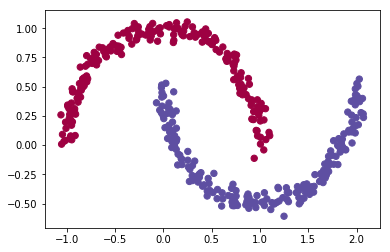

In [3]:
#Dados a serem usados
mat_x, arr_y = sklearn.datasets.make_moons(400, noise=0.05)
plt.scatter(mat_x[:,0], mat_x[:,1], s=40, c=arr_y, cmap=plt.cm.Spectral)

In [4]:
# Crie o modelo de regressão logistica para esses dados
obj_regressao_logistica = RegressaoLogistica(funcao,dz_funcao)


In [5]:
#crie o modelo usando mat_x e arr_y
obj_regressao_logistica.mat_x=mat_x
obj_regressao_logistica.arr_y=arr_y
obj_regressao_logistica.fit(mat_x,arr_y,1.1)

Iteração: 0 Loss: 0.6931471805599452
Iteração: 10 Loss: 0.3748955523780847
Iteração: 20 Loss: 0.32618926004668475
Iteração: 30 Loss: 0.30357991007852303
Iteração: 40 Loss: 0.28968423017927136
Iteração: 50 Loss: 0.2801856711125502
Iteração: 60 Loss: 0.2733394811055309
Iteração: 70 Loss: 0.2682374247199292
Iteração: 80 Loss: 0.26434007899932
Iteração: 90 Loss: 0.26130322823881225


Acurácia: 0.875


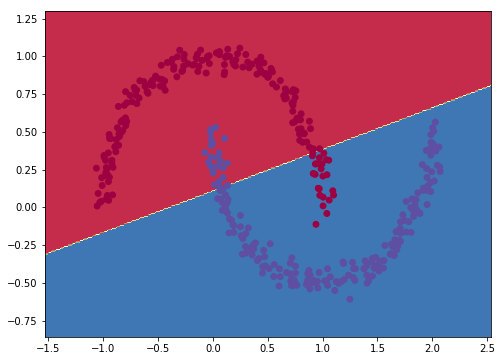

In [6]:
# Apresente aqui a superfície de decisão desses dados
plot_decision_boundary(obj_regressao_logistica,mat_x,arr_y)

# Plotando a acurácia para ter uma métrica númerica direta sobre o desempenho
print(f"Acurácia: {accuracy_score(obj_regressao_logistica.predict(mat_x), arr_y)}")


Descreva o impacto ao alterar a taxa de aprendizado e o número de épocas (`learning_rate` e `num_iteracoes`, respectivamente) algum desses parâmetros podem ocasionar overfitting/underfitting? Quando?